# (연구&교수님) 다중척도논문 – STFT

최규빈  
2024-07-10

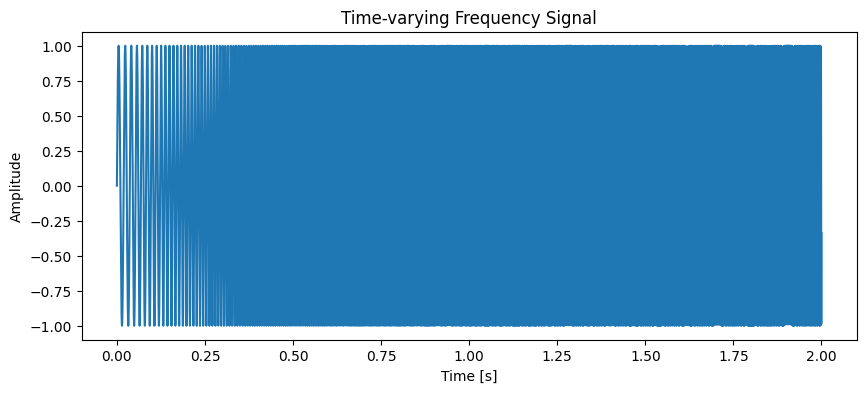

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플링 주파수 및 시간 축 설정
fs = 10000
t = np.linspace(0, 2, 2 * fs, endpoint=False)

# 주파수가 선형적으로 증가하는 신호 생성
f0 = 50  # 시작 주파수
f1 = 300  # 종료 주파수
signal = np.sin(2 * np.pi * (f0 + (f1 - f0) * t / 2) * t)

plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title("Time-varying Frequency Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

#### 주파수 변조 신호의 수식

1.  시간 $t$ 에 따른 주파수 $f(t)$ 는 다음과 같이 선형적으로 증가합니다:
    $$
    f(t) = f_0 + \frac{f_1 - f_0}{T} t
    $$ 여기서 $f_0$ 는 시작 주파수, $f_1$ 는 종료 주파수, $T$ 는 전체
    신호의 지속 시간입니다.

2.  즉각적인 주파수에 따른 각주파수 $\omega(t)$ 는 다음과 같습니다:
    $$\omega(t) = 2 \pi f(t) = 2 \pi \left( f_0 + \frac{f_1 - f_0}{T} t\right)
    $$

3.  각주파수 $\omega(t)$ 를 시간에 대해 적분하면 위상 $\phi(t)$ 를 얻을
    수 있습니다: $$
    \phi(t) = \int \omega(t) \, dt = \int 2 \pi \left( f_0 + \frac{f_1 - f_0}{T} t \right) dt
    $$

4.  위상 $\phi(t)$ 는 다음과 같이 계산됩니다: $$
    \phi(t) = 2 \pi \left( f_0 t + \frac{f_1 - f_0}{T} \frac{t^2}{2} \right)
    $$

5.  따라서 신호 $x(t)$ 는 다음과 같이 표현됩니다: $$
    x(t) = \sin(\phi(t)) = \sin \left( 2 \pi \left( f_0 t + \frac{f_1 - f_0}{T} \frac{t^2}{2} \right) \right)
    $$

#### 예제 신호에 적용

주어진 예제에서 $f_0 = 50$ Hz, $f_1 = 300$ Hz, $T = 2$ 초이므로, 신호는
다음과 같습니다: $$
x(t) = \sin \left( 2 \pi \left( 50t + \frac{300 - 50}{2} \frac{t^2}{2} \right) \right) = \sin \left( 2 \pi \left( 50t + 125t^2 \right) \right)
$$

따라서, 예제에서 사용된 신호의 수식은 다음과 같습니다: $$
x(t) = \sin \left( 2 \pi \left( 50t + 125t^2 \right) \right)
$$

이 수식은 시간 $t$ 에 따라 주파수가 선형적으로 증가하는 신호를 정확하게
나타냅니다.

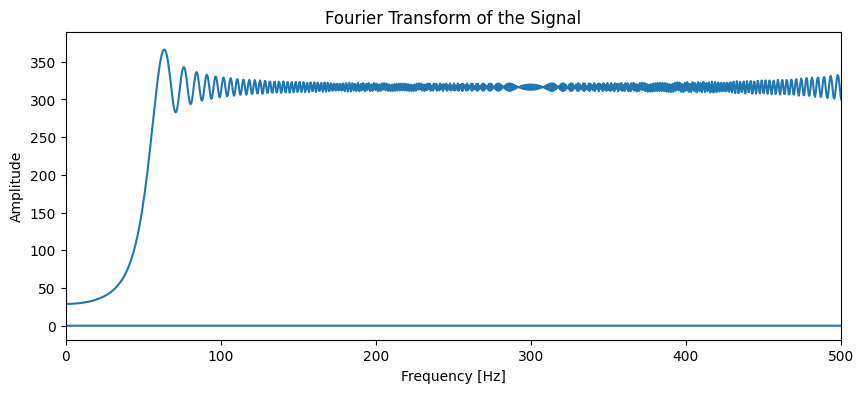

In [11]:
from scipy.fft import fft, fftfreq

# 푸리에 변환 수행
yf = fft(signal)
xf = fftfreq(len(t), 1 / fs)

plt.figure(figsize=(10, 4))
plt.plot(xf, np.abs(yf))
plt.title("Fourier Transform of the Signal")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.xlim(0, 500)
plt.show()

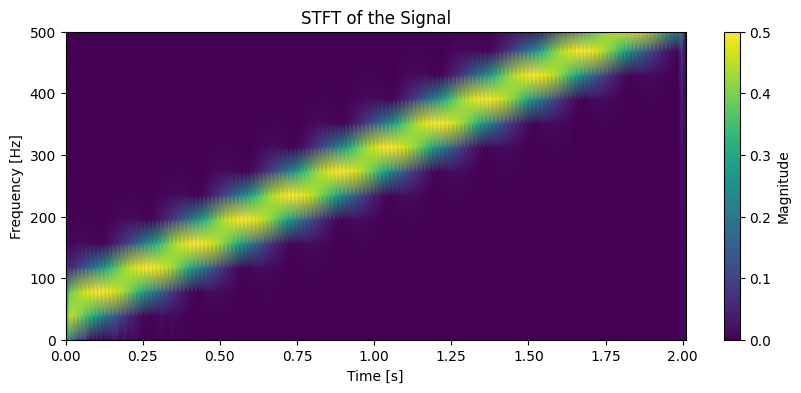

In [12]:
from scipy.signal import stft

# STFT 수행
f, t, Zxx = stft(signal, fs, nperseg=256)

plt.figure(figsize=(10, 4))
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.title("STFT of the Signal")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.colorbar(label='Magnitude')
plt.ylim(0, 500)
plt.show()

위의 두 플롯을 비교하면, 푸리에 변환은 신호의 시간 변화를 포착하지
못하고 전체 주파수 성분만을 보여주는 반면, STFT는 시간-주파수 영역에서
신호를 분석하여 주파수가 시간에 따라 어떻게 변하는지 명확히 보여줍니다.
이러한 특성 때문에 STFT는 시간에 따라 변하는 주파수 성분을 분석하는 데
매우 유용합니다.

이 예제를 통해 STFT의 우수성을 이해할 수 있을 것입니다. 신호가 시간에
따라 어떻게 변하는지를 분석해야 할 때는 STFT가 푸리에 변환보다 훨씬
유리합니다.